<h1> Chapter7. 딥러닝을 시작합니다_패션 럭키백을 판매합니다! </h1>  

<h2> 07-1. 인공 신경망 </h2>

Keyword: `인공 신경망`, `케라스`, `밀집층`, `원-핫 인코딩`

<h3> 패션 MNIST </h3>

In [1]:
#keras package import and load dataset 'fashion_mnist'
#keras.datasets.fashion_mnist module provides load_data() function to load the Fashion MNIST dataset
#The dataset is split into training and testing sets, each containing images and their corresponding labels
import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

2025-11-17 11:11:29.493584: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 11:11:29.560123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763345489.596576    6491 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763345489.611241    6491 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-17 11:11:29.669456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
#print the shape of training and testing input data
#Each image is 28x28 pixels, so the shape will be (60000, 28, 28) for training and (10000, 28, 28) for testing
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


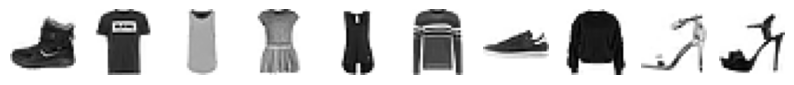

In [3]:
#Display the first image in the training dataset
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
#Check the labels of the first 10 images in the training dataset
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


- `패션 MNIST`의 타깃은 '0~9'까지의 숫자 레이블로 구성됨
- 위의 샘플 출력값에서 마지막 2개의 샘플이 같은 레이블 (숫자5)을 갖고 있음
- 출력 이미지에서도 2개의 샘플은 같은 종류의 신발임을 알 수 있음
- `패션 MNIST`에 포함된 10개의 레이블의 의미는 아래와 같음   
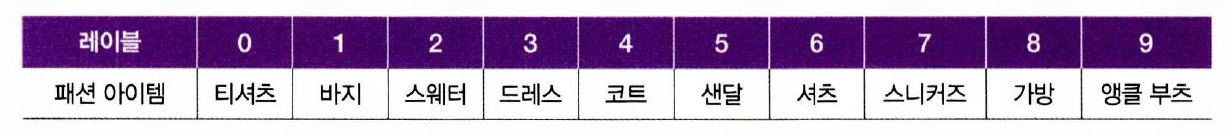


In [5]:
#Check the number of samples for each label in the training dataset using numpy unique function
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


<h3> 로지스틱 회귀로 패션 아이템 분류하기 </h3>

- 훈련 샘플이 60,000개이므로 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 것이 더 효율적<br>
-> **확률적 경사 하강법**
<br>

- 4장에서는 `SGDClassifier`클래스의 `loss`매개변수를 `'log_loss'`로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델을 생성했었음
- `SGDClassifier`를 사용할 때 표준화 전처리된 데이터를 사용했었음
    - 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
    - **특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려올 수 없음**
- `패션 MNIST`의 경우 각 픽셀은 0~255 사이의 정수값을 가짐
    - 이런 이미지의 경우 보통 255로 나누어 **0~1 사이의 값**으로 **정규화**
    - 표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용되는 방법


In [6]:
#Reshape the input data from 2D to 1D using numpy reshape function
#As SGDClassifier in scikit-learn requires 1D input, we need to reshape the 28x28 images into 784-dimensional vectors
train_scaled = train_input / 255.0 #normalize the pixel values to the range [0, 1]
train_scaled = train_scaled.reshape(-1, 28*28)
#-1 indicates that the number of samples is inferred automatically
#Set the second dimension to 28*28=784 to flatten each image into a vector and keep the number of samples unchanged
#Check the shape of the reshaped training data
print(train_scaled.shape)

(60000, 784)


In [7]:
#Check the performance of SGDClassifier on the reshaped training data using cross-validation function
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
# --- note ---
#In this code, we set the max_iter parameter of SGDClassifier to 5 for faster training during cross-validation.
#However, a higher value (e.g., 10 or more) does not achieve better convergence and performance.

/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

0.8194166666666666


- 로지스틱 회귀 공식
    - $ z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f $
    - 패션 MNIST에 맞게 변형하면
    - $ z티셔츠 = w_1 * (픽셀1) + w_2 * (픽셀2) + ... + w_{784} * (픽셀784) + b $
    - 총 784개의 픽셀(특성)이 있으므로, 784개의 가중치와 절편 b로 이루어짐
    - 두번째 레이블인 바지에 맞게 변형하면
    - $ z바지 = w_1' * (픽셀1) + w_2' * (픽셀2) + ... + w_{784}' * (픽셀784) + b' $
        - 티셔츠와 바지의 가중치는 다른 값: 같은 값을 사용한다면 바지와 티셔츠를 구분할 수 없음
    - `SGDClassifier`모델은 패션 MNIST 데이터의 클래스를 가능한 잘 구분할 수 있도록 10개의 방정식에 대한 모델 파라미터 (가중치와 절편)을 찾음<br>
    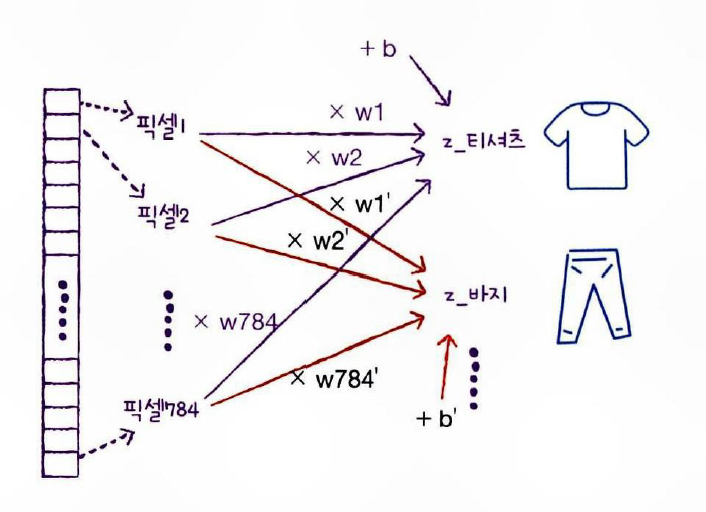
    - 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음 `소프트맥스`함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음


<h3> 인공 신경망(artificial neural network, ANN) </h3>

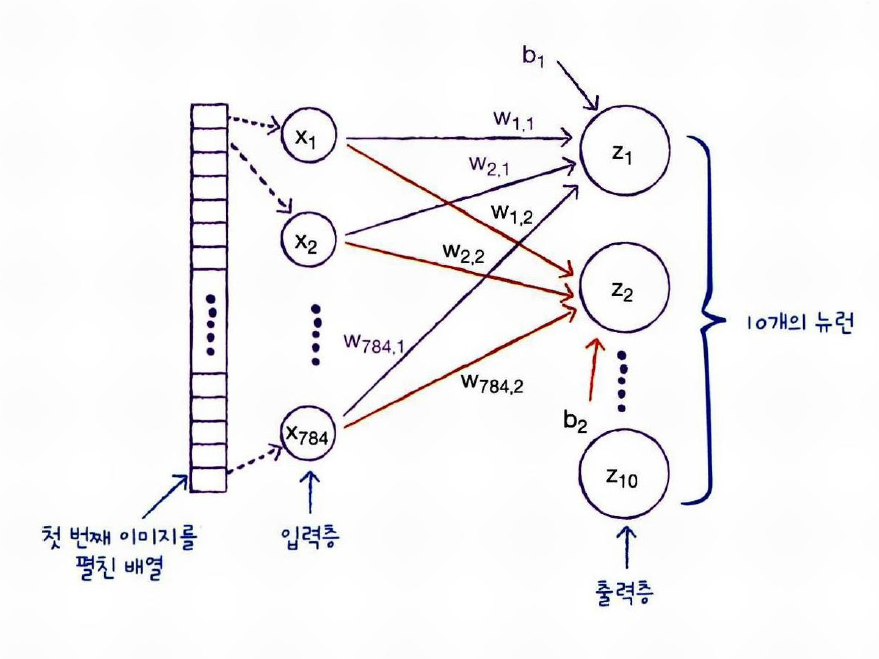<br>
- 클래스 $ z $, 가중치 $ w $, 절편 $ b $, 픽셀 $ x $, 
- **출력층(output layer)**: $z_1$~$z_{10}$ 을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종값을 만드는 층
- **뉴런(neuron)**: 인공 신경망에서 $z$ 값을 계산하는 단위
    - 뉴런에서 일어나는 일은 **선형 계산**이 전부
    - 따라서 뉴런이라는 표현 대신에 **유닛(unit)**이라고 부르는 사람이 더 많아지고 있음
<br>

- **입력층(input layer)**: 픽셀에 해당하는 $x_1$ ~ $x_{784}$, 입력층은 픽셀값 자체이므로 특별한 계산을 수행하지 않음 
<br>

- $z_1$ 을 만들기 위해 *픽셀1*인 $x_1$ 에 곱해지는 가중치는 $w_{1,1}$ 이라고 쓰고 $z_2$ 를 만들기 위해 *픽셀1*인 $x_1$ 에 곱해지는 가중치는 $w_{1,2}$ 라고 표현

In [8]:
import tensorflow as tf
import keras
keras.config.backend()

'tensorflow'

<h3> 인공 신경망으로 모델 만들기 </h3>

- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 **검증 세트를 별도로 덜어내어 사용**
    1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
    2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림

In [9]:
#Split the training data into training and validation sets using sklearn train_test_split function
#Split 20% of the training data as validation set
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
#--- note ---
#Actually, this fasion MNIST dataset is already well balanced, so splitting is not strictly necessary.
#However, in real-world scenarios, datasets may not be well balanced, so it is a good practice to split the data into training and validation sets to monitor model performance during training.

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


- 60,000개 중에 12,000개가 검증 세트로 분리
- 먼저 훈련 세트(train_scaled, train_target)로 모델 생성 후 검증 세트(val_scaled, val_target)로 훈련한 모델을 평가   
<br>

먼저 인공 신경망 그림의 왼쪽에 놓인 층을 생성 (입력층)

In [10]:
#As mentioned earlier, input layer is literally just the input data itself, not a layer for computation.
#However, input layer is often represented as the weight of model dependent to the number of features in the input data in neural network network algorithms.

#In keras, we can use Input function to define the input layer of the model.

inputs = keras.layers.Input(shape=(784,))  #Input layer with shape of 784 (28*28)

#--- note ---
#Be aware not to use input() instead of Input() as the former is a built-in function in Python.
#If you use input() to define the input layer, you cannot use the input() function later in the code.

그 다음 인공 신경망 그림의 오른쪽에 놓은 층을 생성(밀집층) - 10개의 패션 아이템을 분류하기 위해 10개의 뉴런으로 구성됨

- **밀집층(dense layer)**: 신경망에서 가장 기본이 되는 층
- **완전 연결층(fully connected layer)**: 밀집층은 양쪽의 뉴런이 모두 연결하고 있기 때문에 '완전 연결층'이라고도 불림

In [11]:
#Create a dense layer with 10 neurons for classification of 10 fashion items using keras Dense class
#The number of neurons, activation functions for outputs of neurons are needed as parameters

dense = keras.layers.Dense(10, activation='softmax') #1st parameter: number of neurons, 2nd parameter: activation function
#The number of neurons is set to 10 to classify 10 fashion items
#'softmax' activation function is used for multi-class classification problems to output probabilities for each class

#Create the neural network model with input layer and dense layer using keras Sequential class
model = keras.Sequential([inputs, dense])

W0000 00:00:1763345502.025009    6491 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


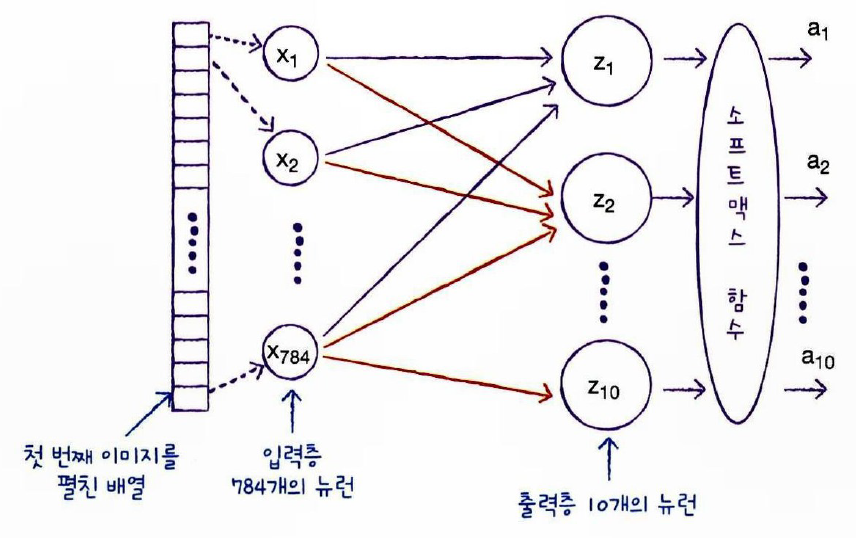

- 위 그림에서는 간결하게 표현하기 위해 입력층과 출력층 사이에 연결선만 나타내고 가중치와 절편은 표현하지 않음
- 하지만 **절편이 뉴런만다 더해진다**는 것을 꼭 기억
- 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수(activation function)**라고 부름
    - 앞으로 이 값을 **a**로 표시하겠음

---
활성화 함수는 뉴런의 출력에 바로 적용되기 때문에 보통 층의 일부로 나타냄   
하지만 종종 "소프트맥스 층을 적용했다"라고 표현하는 경우도 많음   
가중치와 절편으로 선형 계산을 수행하는 층을 좁은 개념의 신경망 층으로 생각한다면 소프트맥스 층은 넓은 의미의 층이라고 볼 수 있음   
케라스 API에서도 층의 개념을 폭넓게 적용하고 있음

<h3> 인공 신경망으로 패션 아이템 분류하기 </h3>

- 케라스 모델은 훈련하기 전에 설정 단계 필요
    - `model` 객체의 `compile()` 메서드에서 수행
    - **손실 함수의 종류**를 꼭 지정해야 함
    - 그 후 훈련 과정에서 계산하고 싶은 측정값을 지정

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#In multi-class classification problems, cross-entropy loss function is commonly used.
#In keras, these two kinds of cross-entropy loss functions are provided:
#1. loss='binary_crossentropy' for binary classification problems
#2. loss='sparse_categorical_crossentropy' for multi-class classification problems


In [13]:
model.fit(train_scaled, train_target, epochs=5) #epochs: number of training iterations


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7383 - loss: 0.7812
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8382 - loss: 0.4810
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8460 - loss: 0.4502
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8480 - loss: 0.4433
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8536 - loss: 0.4380


In [14]:
model.evaluate(val_scaled, val_target) #evaluate the model on the validation set using evaluate() method


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8425 - loss: 0.4467


[0.4535875618457794, 0.8415833115577698]

<h2> 07-2. 심층 신경망 </h2>

keyword: `심층 신경망`, `렐루 함수`, `옵티마이저`

<h3> 2개의 층 </h3>

In [15]:
#Import fashion MNIST dataset using keras API
import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

In [16]:
#Normalize image pixel values from 0–255 to 0–1
#Flatten each 28×28 image into a 784-dim 1D vector
#Split the dataset into training and validation sets using scikit-learn train_test_split()
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

#Create a hidden layer using Keras Dense class with a sigmoid activation function
#, and an output layer with softmax function
#Define the input layer using Keras Input() function
inputs = keras.layers.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

<h3> 심층 신경망 만들기 </h3>

In [17]:
#Build a deep neural network by adding the inputs, dense1, and dense2 layers to a Keras Sequential model
model = keras.Sequential([inputs, dense1, dense2])

#Get the inspection of the layer configuration by Keras summary() method
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

<h3> 층을 추가하는 다른 방법 </h3>

In [18]:
#Previously, we created inputs, dense1, and dense2 as separate Dense layer objects before passing them into Sequential class
#However, there is no need to store these layer objects individually, it's common to instantiate the layers directly inside the Sequential constructor
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
    keras.layers.Dense(10, activation='softmax', name='출력층')
    ], name='패션 MNIST 모델')

In [19]:
#Create objects of Sequential class and add layers using add() method of these objects
#This approach allows you to add layers dynamically, giving more flexibility in constructing the network
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Train model with compile() method with setting epochs=5
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7504 - loss: 0.7847
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.4268
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3800
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8738 - loss: 0.3490
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8769 - loss: 0.3298


<h3> 렐루 함수 </h3>

- 기존 시그모이드 함수의 단점: input(가중합)이 양쪽 끝단으로 갈 수록 saturation됨 - 올바른 출력을 낼 수 없음
- **렐루(ReLU) 함수**: 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력값을 통과, 음수일 경우 0으로 만듦 (심층신경망에서 뛰어난 성능)
- 렐루 함수 = $max(0, z)$
  - 특히 이미지 처리에서 좋은 성능을 냄
- 앞에서는 데이터 셋을 인공 신경망에 넣기 위해 넘파이 배열의 `reshape()` 메서드를 이용하여 1차원으로 펼침
- 케라스의 **Flatten 층**을 사용하면 편리함
  - 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
  - 입력에 곱해지는 가중치나 절편이 없음 = 성능에 기여 X
  - 층처럼 입력층과 은닉층 사이에 추가하기 때문에 '층'이라고 부름

In [21]:
#Serialize the data into a single vector using Keras Flatten layer
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28))) #insert size of original image
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- Flatten 클래스에 포함된 모델 파라미터는 0개
- 케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있다는 것이 또 하나의 장점
  - 784개의 입력이 첫 번째 은닉층에 전달된다는 것을 알 수 있음
- 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스API 철학 중 하나

In [22]:
#Re-train the model with newly prepared training data
#The code is the same as before, but without using the reshape() method
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

#compile and train model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

#check the performance of validation set
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7667 - loss: 0.6713
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8554 - loss: 0.3945
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8705 - loss: 0.3551
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8807 - loss: 0.3342
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8882 - loss: 0.3138
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.3652


[0.3671550750732422, 0.875]

- 시그모이드 함수를 사용했을 때보다 성능이 조금 향상
- 검증세트에서의 성능도 1절의 은닉층을 추가하지 않은 경우보다 몇 퍼센트 향상

<h3> 옵티마이저 </h3>

- 하이퍼파라미터: 모델이 학습하지 않아 사람이 지정해줘야 하는 파라미터
  - 신경망에는 특히 하이퍼파라미터가 많음
  - 지금까지 다룬 하이퍼파라미터는 추가할 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 등이 있음

- `compile()` 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 **RMSprop**을 사용
- 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공 = 옵티마이저(optimizer)

In [23]:
#Train fashion MNIST model using default parameter of Adam class
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



In [24]:
#Set optimizer of compile() method as 'adam' and train druing epochs=5
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

#similar performance compared with default RMSprop
#check the performance of validation set
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7731 - loss: 0.6720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8576 - loss: 0.3989
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.3501
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8831 - loss: 0.3271
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8901 - loss: 0.3028
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8787 - loss: 0.3400


[0.3412269055843353, 0.8774166703224182]

<h2> 07-3. 신경망 모델 훈련 </h2>

keyword: `드롭아웃`, `콜백`, `조기 종료`

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['accuracy', 'loss'])


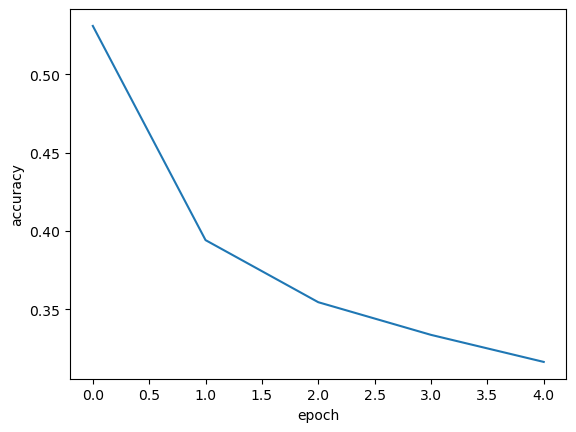

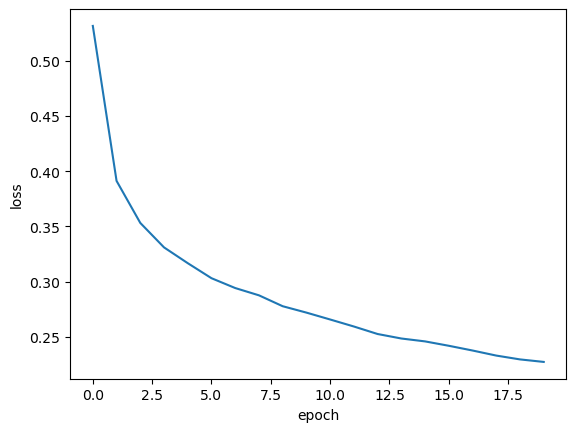

In [25]:
#Training neural network model

##loss curve

import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28, 28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()

model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

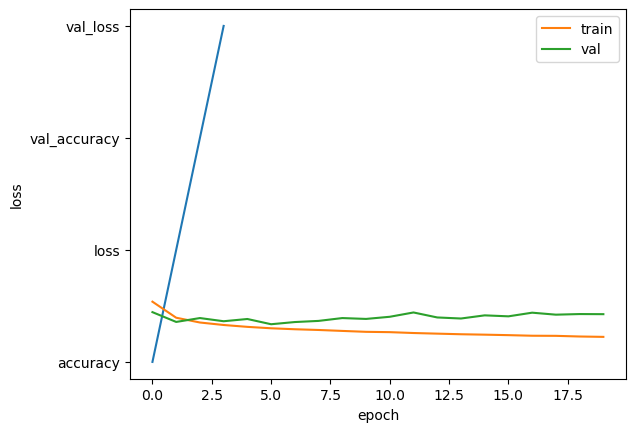

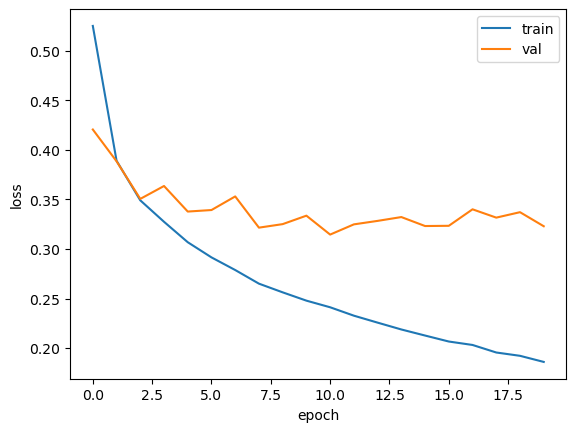

In [28]:
##validation loss

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history.keys())

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
##dropout
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7374 - loss: 0.7570 - val_accuracy: 0.8515 - val_loss: 0.4218
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8396 - loss: 0.4442 - val_accuracy: 0.8585 - val_loss: 0.3866
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.4103 - val_accuracy: 0.8611 - val_loss: 0.3755
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8587 - loss: 0.3859 - val_accuracy: 0.8644 - val_loss: 0.3655
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8654 - loss: 0.3717 - val_accuracy: 0.8710 - val_loss: 0.3451
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8699 - loss: 0.3619 - val_accuracy: 0.8737 - val_loss: 0.3420
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8729 - loss: 0.3473 - val_accuracy: 0.8751 - val_loss: 0.3373
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8758 - loss: 0.3370 - 

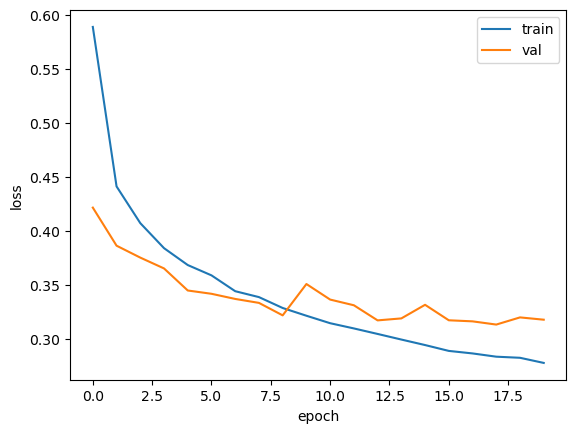

In [32]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
#Save and recovery of model
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7317 - loss: 0.7645 - val_accuracy: 0.8466 - val_loss: 0.4207
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.4498 - val_accuracy: 0.8597 - val_loss: 0.3885
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8534 - loss: 0.4030 - val_accuracy: 0.8647 - val_loss: 0.3696
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.3854 - val_accuracy: 0.8713 - val_loss: 0.3558
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8639 - loss: 0.3732 - val_accuracy: 0.8709 - val_loss: 0.3462
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8702 - loss: 0.3538 - val_accuracy: 0.8771 - val_loss: 0.3381
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8723 - loss: 0.3408 - val_accuracy: 0.8808 - val_loss: 0.3274
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8767 - loss: 0.3335 - 

In [34]:
model.save('model-whole.keras')

In [36]:
model.save_weights('model.weights.h5')

In [37]:
!ls -al model*

-rw-r--r-- 1 hagyeong hagyeong 979394 Nov 17 14:39 model-whole.keras
-rw-r--r-- 1 hagyeong hagyeong 976600 Nov 17 14:39 model.weights.h5


In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [39]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
0.8849166666666667


In [41]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8855 - loss: 0.3281


[0.329416424036026, 0.8849166631698608]

In [43]:
#callback
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [44]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target) 

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8895 - loss: 0.3143


[0.3168037235736847, 0.8888333439826965]

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                    restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])



In [46]:
print(early_stopping_cb.stopped_epoch)

10


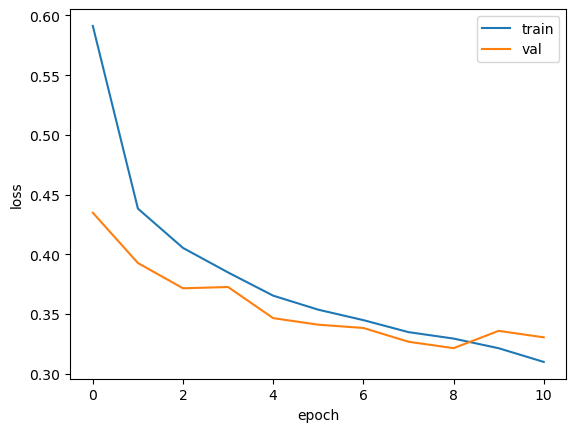

In [47]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [48]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.3181


[0.3213236629962921, 0.8801666498184204]